**Imports**

In [1]:
# Imports:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern


**Simple operators**

In [2]:
# Canny edge detector:
def canny_edge_detector(image, threshold_1: int = 50, threshold_2: int = 150) -> list:
    edges = cv2.Canny(image, threshold_1, threshold_2)
    return edges

# Hough lines detection: 
def hough_lines_detector(image, canny_threshold_1: int = 50, canny_threshold_2: int = 150, threshold=100, minLineLength=50, maxLineGap=10) -> list:
    edges = cv2.Canny(image, canny_threshold_1, canny_threshold_2)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold, minLineLength, maxLineGap)
    return lines

# Contour detection:
def contour_detector(image, threshold_1: int = 127, threshold_2: int = 255):
    _, binary_image = cv2.threshold(image, threshold_1, threshold_2, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# Color detection:
def color_detector(image, lower_bounds: list, upper_bounds: list) -> list:
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = np.zeros(hsv_image.shape[:2], dtype=np.uint8)
    for lower_bound, upper_bound in zip(lower_bounds, upper_bounds):
        lower_bound = np.array(lower_bound)
        upper_bound = np.array(upper_bound)
        mask += cv2.inRange(hsv_image, lower_bound, upper_bound)
    return mask

# Texture detector with local binary pattern:
def lbp_texture_detector(image):
    lbp = local_binary_pattern(image, P=8, R=1, method='uniform')
    return lbp

**Simple operators draw functions**

In [3]:
# Draw canny edge detector: 
def draw_canny_edge_detector(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title('Image with detected edges')
    plt.axis('off')
    plt.show()

# Draw hough lines detection: 
def draw_hough_lines_detector(image, lines):
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2) 
    color_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(color_image_rgb)
    plt.title('Image with Detected Lines')
    plt.axis('off')
    plt.show()

# Draw contour detector:
def draw_contour_detector(image, contours):
    cv2.drawContours(image, contours, -1, (255, 0, 0), 2)
    image_with_contours_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_contours_rgb)
    plt.title('Image with detected Contours')
    plt.axis('off')
    plt.show()

# Draw color detector:
def draw_color_detector(mask):
    plt.figure(figsize=(10,10))
    plt.imshow(mask, cmap='gray')
    plt.title("Detected red-brown colors")
    plt.axis('off')
    plt.show()

# Draw texture detector with local binary pattern:
def draw_lbp_texture_detector(lbp):
    lbp = (lbp / np.max(lbp)) * 255
    lbp = lbp.astype(np.uint8)
    plt.figure(figsize=(8, 6))
    plt.imshow(lbp, cmap='gray')
    plt.title("Texture filter using LBP")
    plt.axis('off')
    plt.colorbar(label='LBP Code')
    plt.show()



**Apply simple operators**

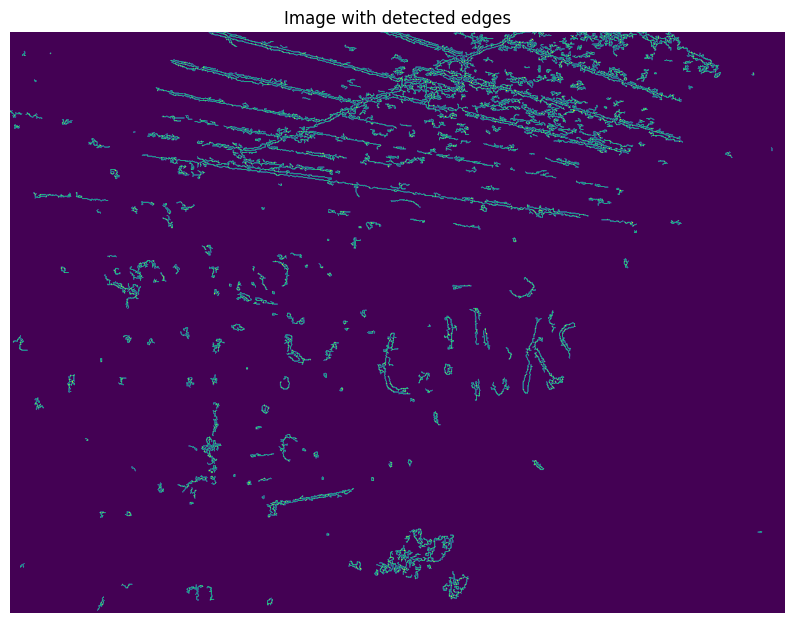

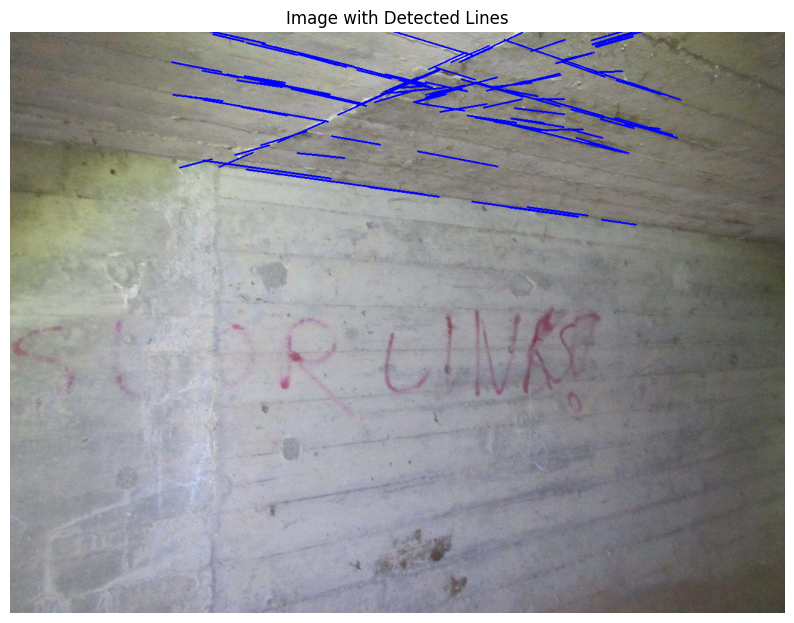

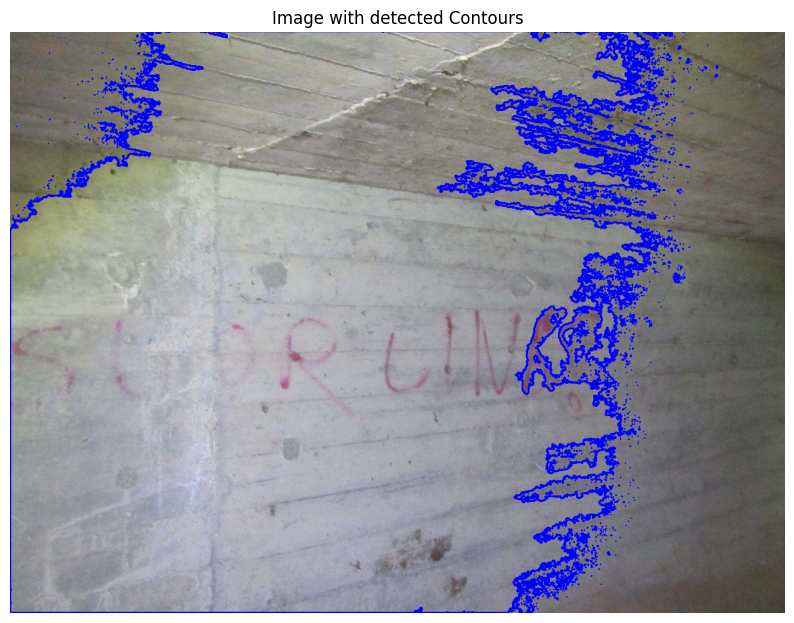

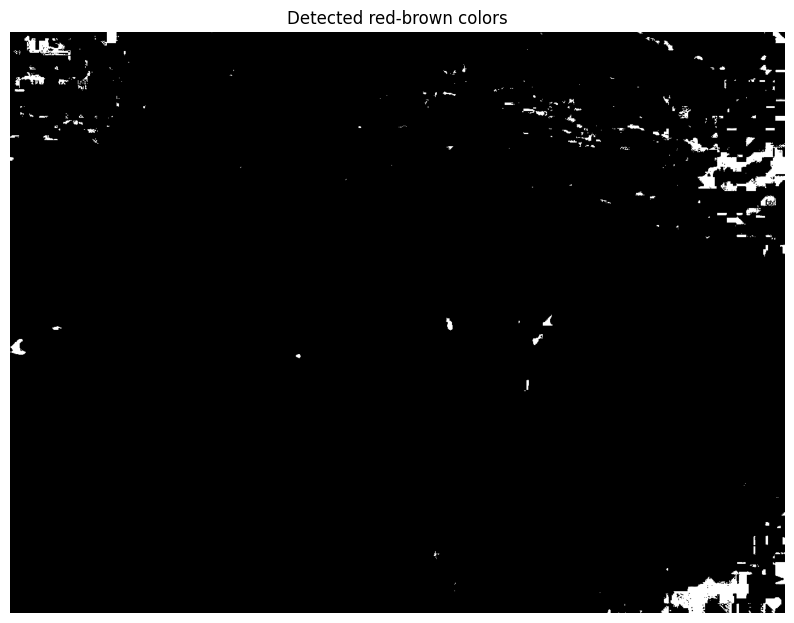

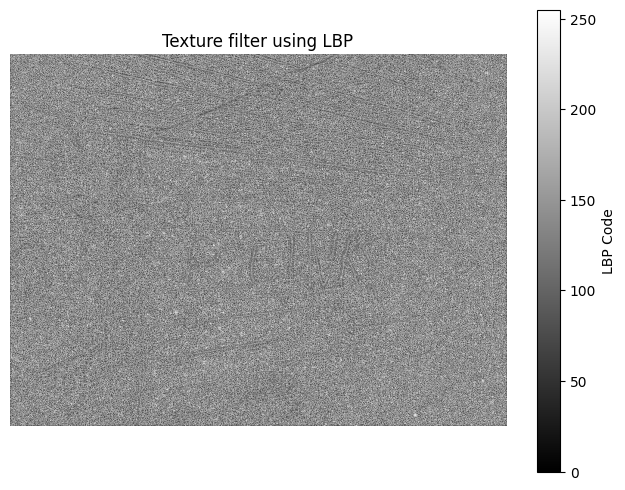

In [4]:
# Read in image:
path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0005.jpg"
image_path = path + file
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
grey_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply canny edge detection:
edges = canny_edge_detector(image.copy(), 50, 150)
draw_canny_edge_detector(edges)

# Apply hough lines detection:
#lines = hough_lines_detector(image.copy(), 50, 150, 100, 50, 10)
edges = cv2.Canny(image.copy(), 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)
draw_hough_lines_detector(image.copy(), lines)

# Apply contour detection:
contours = contour_detector(grey_image.copy(), 127, 255)
draw_contour_detector(image.copy(), contours)

# Apply color detection:
rusty_lower_bounds = [[0, 40, 50], [170, 40, 50]]
rusty_upper_bounds = [[20, 255, 200], [180, 255, 200]]
mask = color_detector(image.copy(), rusty_lower_bounds, rusty_upper_bounds)
draw_color_detector(mask)

# Apply texture analysis using LBP:
lbp_image = lbp_texture_detector(grey_image)
draw_lbp_texture_detector(lbp_image)


